In [ ]:
# Delhi Air Quality Analysis and Forecasting

#This project explores historical air quality data from Delhi to identify trends, analyze the impact of seasonal changes, and build a predictive model for the Air Quality Index (AQI).

In [ ]:
%pip install statsmodels
%pip install matplotlib
%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [ ]:
import pandas as pd

# Use the full path from the "Location" field in your screenshot
# The r"" makes sure Python reads the path correctly on Windows
df = pd.read_csv(r"C:\Users\anura\Downloads\archive\final_dataset.csv")

print(df.head())

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()


In [ ]:
df.info()


In [ ]:
df['Year'].value_counts()
df['Month'].value_counts()
# This groups all the data by month, then calculates the average AQI for each group.
df.groupby('Month')['AQI'].mean()


In [ ]:
# This groups all the data by month, then calculates the average AQI for each group.
df.groupby('Year')['AQI'].mean()

In [ ]:
import matplotlib.pyplot as plt

# First, store the result of your groupby in a variable
yearly_avg_aqi = df.groupby('Year')['AQI'].mean()

# Now, create a bar chart from it
yearly_avg_aqi.plot(kind='bar', figsize=(10, 6))

plt.title('Average AQI per Year')
plt.ylabel('Mean AQI')
plt.xlabel('Year')
plt.xticks(rotation=0)  # Keeps the year labels horizontal
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
# Rename the 'Date' column to 'Day' for clarity
df.rename(columns={'Date': 'Day'}, inplace=True)

# Create a new column by combining Year, Month, and Day
df['Full_Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Now, create the line plot
df.plot(x='Full_Date', y='AQI', figsize=(15, 7))

plt.title('Daily AQI Trend (2021-2024)')
plt.ylabel('AQI Value')
plt.xlabel('Date')
plt.grid(True)
plt.show()


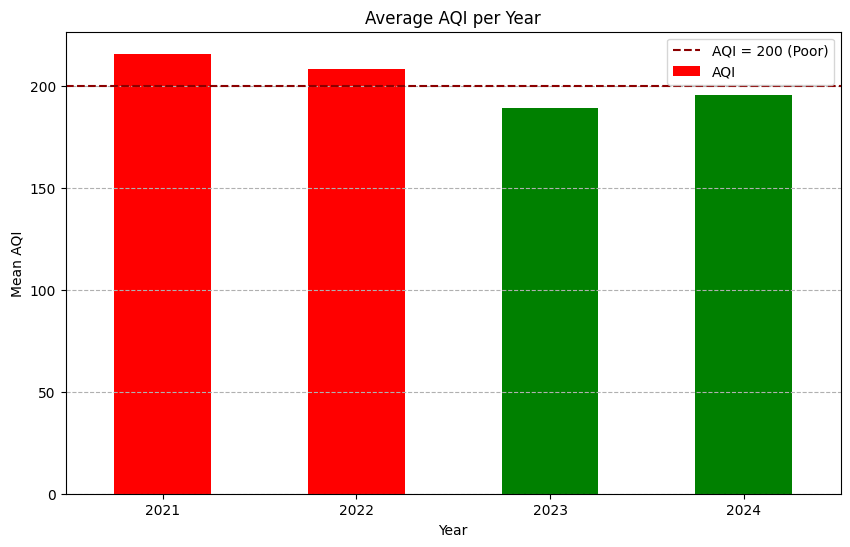

In [47]:
import matplotlib.pyplot as plt

# 1. Calculate the yearly average AQI
yearly_avg_aqi = df.groupby('Year')['AQI'].mean()

# 2. Create a list of colors based on the condition (AQI > 200)
colors = ['red' if aqi > 200 else 'green' for aqi in yearly_avg_aqi]

# 3. Create the bar chart, passing the custom colors
yearly_avg_aqi.plot(kind='bar', figsize=(10, 6), color=colors)

# --- Add enhancements to the plot ---
plt.title('Average AQI per Year')
plt.ylabel('Mean AQI')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Add a horizontal line at the 200 AQI threshold
plt.axhline(y=200, color='darkred', linestyle='--', label='AQI = 200 (Poor)')
plt.legend() # This displays the label for the horizontal line

plt.show()